In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re

In [2]:
# Creating a pandas dataframe from reviews.txt file
data = pd.read_csv('Data Skripsi - Sheet41.csv')
data.head()

,Name,Comment,Time,Likes,Reply Count,Reply Author,Reply,Published,Updated
0,agit 12345,"mampus kalian penyembah PDI, skarang makan tu ...",2022-07-08T05:27:34Z,0,0,NaN,NaN,NaN,NaN
1,Jagapura Panjan,uda gak ane kalo mau ada praya&#39;an <br>copi...,2022-07-07T07:17:00Z,0,0,NaN,NaN,NaN,NaN
2,Imron Sadewo,Setuju banget biar benar&quot;sehat n bersih d...,2022-07-06T17:48:41Z,0,1,NaN,NaN,NaN,NaN
3,Garry Gabriel Ginting,Kasihan yang dibali bro. Mana toleransi mu?,2022-07-07T02:33:26Z,0,0,NaN,NaN,NaN,NaN
4,Frans khadavi,Aturan koplak.temen ekonomi.sdh susah ppkm lag...,2022-07-06T06:33:04Z,2,0,NaN,NaN,NaN,NaN


In [3]:
#definisi dataframe
mydata  = pd.DataFrame(data[['Name', 'Comment']])#ubah dataframe sesuai column kalian
mydata.head()

,Name,Comment
0,agit 12345,"mampus kalian penyembah PDI, skarang makan tu ..."
1,Jagapura Panjan,uda gak ane kalo mau ada praya&#39;an <br>copi...
2,Imron Sadewo,Setuju banget biar benar&quot;sehat n bersih d...
3,Garry Gabriel Ginting,Kasihan yang dibali bro. Mana toleransi mu?
4,Frans khadavi,Aturan koplak.temen ekonomi.sdh susah ppkm lag...


In [4]:
#Menghapus missing value
mydata.isnull().sum()

Name       0
Comment    0
dtype: int64

In [5]:
mydatax = mydata.dropna()
mydatax 

,Name,Comment
0,agit 12345,"mampus kalian penyembah PDI, skarang makan tu ..."
1,Jagapura Panjan,uda gak ane kalo mau ada praya&#39;an <br>copi...
2,Imron Sadewo,Setuju banget biar benar&quot;sehat n bersih d...
3,Garry Gabriel Ginting,Kasihan yang dibali bro. Mana toleransi mu?
4,Frans khadavi,Aturan koplak.temen ekonomi.sdh susah ppkm lag...
...,...,...
378,JustAbrony™( A Man Who Like My Litte Pony),@Wisnu Saputra Apa gk Nerima fakta nya kah?
379,Wisnu Saputra,@JustAbrony™( A Man Who Like My Litte Pony) bu...
380,callista sulaiman,@Wisnu Saputra sama ga ngerti jg gw 😂 mgkn bah...
381,Herman mulyana Mulyana,Terlalu dibesar-besarkan lebay!!


In [6]:
#remove user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt    
mydatax['remove_user'] = np.vectorize(remove_pattern)(mydatax['Comment'], "@[\w]*")

In [7]:
def remove(Comment):
    #remove angka
    Comment = re.sub('[0-9]+', '', Comment)
    
    # remove stock market tickers like $GE
    Comment = re.sub(r'\$\w*', '', Comment)
 
    # remove old style reComment text "RT"
    Comment = re.sub(r'^RT[\s]+', '', Comment)
    
    # remove hashtags
    # only removing the hash # sign from the word
    Comment = re.sub(r'#', '', Comment)
    return Comment
mydatax['remove_http'] = mydatax['remove_user'].apply(lambda x: remove(x))
mydatax.sort_values("remove_http", inplace = True)
mydatax.drop_duplicates(subset ="remove_http", keep = 'first', inplace = True)

In [8]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Hikari
[nltk_data]     A\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
pip install Sastrawi


Note: you may need to restart the kernel to use updated packages.


In [10]:
#import stopword
from nltk.corpus import stopwords 
stopwords_indonesia = stopwords.words('indonesian')
 
#import sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#tokenize
from nltk.tokenize import TweetTokenizer



In [11]:
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)

In [12]:
def clean_Comments(Comment):
    # remove stock market tickers like $GE
    Comment = re.sub(r'\$\w*', '', Comment)
 
    # remove old style reComment text "RT"
    Comment = re.sub(r'^RT[\s]+', '', Comment)
 
    # remove hyperlinks
    Comment = re.sub(r'https?:\/\/.*[\r\n]*', '', Comment)
    
    # remove hashtags
    # only removing the hash # sign from the word
    Comment = re.sub(r'#', '', Comment)
    
    #remove coma
    Comment = re.sub(r',','',Comment)
    
    #Comment = re.sub(r'a','',Comment)

    
    Comment = re.sub(r'href','',Comment)

    #remove angka
    Comment = re.sub('[0-9]+', '', Comment)

    Comment = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',Comment) # menghilangkan url

    # tokenize Comments
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    Comment_tokens = tokenizer.tokenize(Comment)
 
    Comments_clean = []    
    for word in Comment_tokens:
        if (word not in stopwords_indonesia and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #Comments_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            Comments_clean.append(stem_word)
 
    return Comments_clean
mydatax['Comment_clean'] = mydatax['remove_http'].apply(lambda x: clean_Comments(x))

In [13]:
def remove_punct(text):
    text  = " ".join([char for char in text if char not in string.punctuation])
    return text
mydatax['Komentar'] = mydatax['Comment_clean'].apply(lambda x: remove_punct(x))

mydatax.sort_values("Komentar", inplace = True)
mydatax.drop(mydatax.columns[[0,1,2,3,4]], axis = 1, inplace = True)
mydatax.drop_duplicates(subset ="Komentar", keep = 'first', inplace = True)
mydatax.to_csv('output.csv',encoding='utf8', index=False)
mydatax

,Komentar
335,
341,a
379,a man who like my litte pony gak terima keti l...
27,aamiin
75,aamiin gua kangen sekolah onlinee cokk
...,...
158,yg ketat covid lvl tempat dah longgar lebaran ...
243,yg kuat ya yg tahan br sampe kalah covid
123,yg punye jakarte lengserrr br kebut korupsinye...
251,yu dislike breng breng


In [14]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [15]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Hikari
[nltk_data]     A\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
sastrawi_data = mydatax
sastrawi_data

,Komentar
335,
341,a
379,a man who like my litte pony gak terima keti l...
27,aamiin
75,aamiin gua kangen sekolah onlinee cokk
...,...
158,yg ketat covid lvl tempat dah longgar lebaran ...
243,yg kuat ya yg tahan br sampe kalah covid
123,yg punye jakarte lengserrr br kebut korupsinye...
251,yu dislike breng breng


In [17]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\Hikari
[nltk_data]     A\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Hikari A\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
  tags = pos_tag(word_tokenize(text))
  newlist = []
  for word, tag in tags:
    if word.lower() not in set(stopwords.words('indonesian')):
      newlist.append(tuple([word, pos_dict.get(tag[0])]))
  return newlist
sastrawi_data['POS tagged'] = sastrawi_data['Komentar'].apply(token_stop_pos)
sastrawi_data.head()
# mydata['POS tagged'][0]

[nltk_data] Downloading package stopwords to C:\Users\Hikari
[nltk_data]     A\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Hikari
[nltk_data]     A\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Komentar,POS tagged
335,,[]
341,a,"[(a, None)]"
379,a man who like my litte pony gak terima keti l...,"[(a, None), (man, n), (who, None), (like, None..."
27,aamiin,"[(aamiin, n)]"
75,aamiin gua kangen sekolah onlinee cokk,"[(aamiin, n), (gua, n), (kangen, n), (sekolah,..."


In [19]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data): 
  lemma_rew = " " 
  for word, pos in pos_data: 
    if not pos:  
      lemma = word 
      lemma_rew = lemma_rew + " " + lemma 
    else:
      lemma = wordnet_lemmatizer.lemmatize(word, pos=pos) 
      lemma_rew = lemma_rew + " " + lemma
  return lemma_rew 

sastrawi_data['Lemma'] = sastrawi_data['POS tagged'].apply(lemmatize) 
sastrawi_data.head()

,Komentar,POS tagged,Lemma
335,,[],
341,a,"[(a, None)]",a
379,a man who like my litte pony gak terima keti l...,"[(a, None), (man, n), (who, None), (like, None...",a man who like my litte pony gak terima keti...
27,aamiin,"[(aamiin, n)]",aamiin
75,aamiin gua kangen sekolah onlinee cokk,"[(aamiin, n), (gua, n), (kangen, n), (sekolah,...",aamiin gua kangen sekolah onlinee cokk


In [20]:
sastrawi_data[['Komentar','Lemma']]

,Komentar,Lemma
335,,
341,a,a
379,a man who like my litte pony gak terima keti l...,a man who like my litte pony gak terima keti...
27,aamiin,aamiin
75,aamiin gua kangen sekolah onlinee cokk,aamiin gua kangen sekolah onlinee cokk
...,...,...
158,yg ketat covid lvl tempat dah longgar lebaran ...,yg ketat covid lvl dah longgar lebaran mpe a...
243,yg kuat ya yg tahan br sampe kalah covid,yg kuat ya yg tahan br sampe kalah covid
123,yg punye jakarte lengserrr br kebut korupsinye...,yg punye jakarte lengserrr br kebut korupsin...
251,yu dislike breng breng,yu dislike breng breng


In [21]:
fin_data = sastrawi_data

In [22]:
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to C:\Users\Hikari
[nltk_data]     A\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [23]:
from nltk.corpus import sentiwordnet as swn
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue

        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()
        
   # if not tokens_count:
    #    return 0
    if sentiment>0:
      return "Positive"
    if sentiment==0:
      return "Neutral"
    else:
      return "Negative"
fin_data['SWN analysis'] = fin_data['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

,Komentar,POS tagged,Lemma,SWN analysis
335,,[],,Neutral
341,a,"[(a, None)]",a,Neutral
379,a man who like my litte pony gak terima keti l...,"[(a, None), (man, n), (who, None), (like, None...",a man who like my litte pony gak terima keti...,Neutral
27,aamiin,"[(aamiin, n)]",aamiin,Neutral
75,aamiin gua kangen sekolah onlinee cokk,"[(aamiin, n), (gua, n), (kangen, n), (sekolah,...",aamiin gua kangen sekolah onlinee cokk,Neutral


In [24]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Neutral     321
Negative     31
Positive     16
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x26a17ea7580>,
 [Text(-1.0126368795966334, 0.4296120925681606, 'Neutral'),
  Text(0.9447063175386378, -0.5634979801228985, 'Negative'),
  Text(1.0897545577885346, -0.14978318924070053, 'Positive')],
 [Text(-0.5523473888708909, 0.2343338686735421, '87.2%'),
  Text(0.5152943550210751, -0.3073625346124901, '8.4%'),
  Text(0.5944115769755642, -0.08169992140401845, '4.3%')])

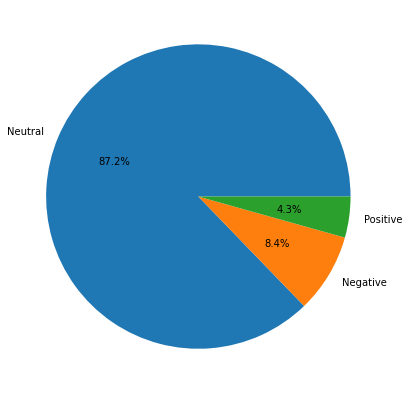

In [25]:
swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, autopct='%1.1f%%', shadow=False)
# plt.legend()

In [26]:
HapusNeutral = fin_data

In [27]:
for i in HapusNeutral.index:
  #print(HapusNeutral["SWN analysis"][i])
  if HapusNeutral["SWN analysis"][i] == "Neutral":
    HapusNeutral = HapusNeutral.drop([i], axis=0)
    #print(HapusNeutral["SWN analysis"][i])

In [28]:
swn_counts= HapusNeutral['SWN analysis'].value_counts()
swn_counts

Negative    31
Positive    16
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x26a17ef62b0>,
 [Text(-0.528639873056473, 0.9646449526197897, 'Negative'),
  Text(0.5286397827398923, -0.9646450021146222, 'Positive')],
 [Text(-0.288349021667167, 0.5261699741562489, '66.0%'),
  Text(0.2883489724035776, -0.5261700011534303, '34.0%')])

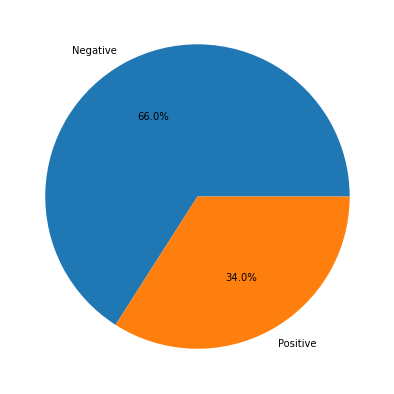

In [29]:
swn_counts= HapusNeutral['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, autopct='%1.1f%%', shadow=False)
# plt.legend()

In [30]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


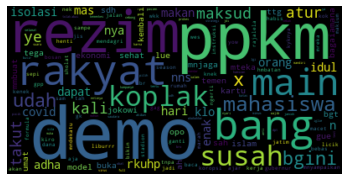

In [31]:
from wordcloud import WordCloud
komentarSWN=' '
for i in fin_data[fin_data['SWN analysis']=='Positive']['Komentar']:
    komentarSWN+=i+' '
    
# Make the figure
wordcloud = WordCloud().generate(komentarSWN)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

In [32]:
# TF-IDF
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

vectorizer = CountVectorizer()
tf_transformer = TfidfTransformer()

datavector = vectorizer.fit_transform(HapusNeutral['SWN analysis'])
datatfidf = tf_transformer.fit_transform(datavector)
datavector.shape

(47, 2)

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1).fit(datatfidf)
hasil=kmeans.labels_
len(hasil)

47

In [34]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(datatfidf, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)
print("Inertia  :", kmeans.inertia_)

Silhouetter Score: 1.000
Inertia  : 0.0


<AxesSubplot:>

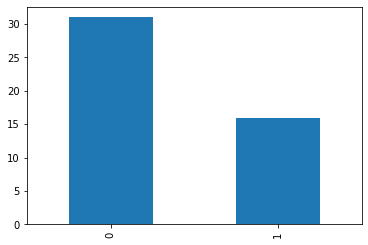

In [35]:
hist = pd.value_counts(hasil)
hist.plot(kind='bar')

In [36]:
#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer

Naivebayes = HapusNeutral

In [37]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(Naivebayes['Komentar'],
                                                                 Naivebayes['SWN analysis'],test_size=0.2)

In [38]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [39]:
Tfidf_vector = TfidfVectorizer()
Tfidf_vector.fit(Naivebayes['Komentar'])

x_train_Tfidf = Tfidf_vector.transform(x_train)
x_test_Tfidf = Tfidf_vector.transform(x_test)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(Naivebayes['SWN analysis'].values.astype('U'))

In [41]:
X=text_counts
y=Naivebayes['Komentar']

In [42]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *

cnb = ComplementNB()
y_prednb = nb = cnb.fit(x_train_Tfidf,y_train)

print ("Train accuracy ={:.2f}%".format(cnb.score(x_train_Tfidf,y_train)*100))
print ("Test accuracy ={:.2f}%".format(cnb.score(x_test_Tfidf,y_test)*100))
train_acc_cnb=cnb.score(x_train_Tfidf,y_train)
test_acc_cnb=cnb.score(x_test_Tfidf,y_test)

Train accuracy =100.00%
Test accuracy =90.00%


In [43]:
from sklearn.metrics import *
#Predict test data set
y_pred_cnb =cnb.predict(x_test_Tfidf)

#This is the confusion matrix :
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_cnb))

[[4 1]
 [0 5]]


In [44]:
print(classification_report(y_test,y_pred_cnb))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred_cnb)
print(cm)
accuracy_score(y_test,y_pred_cnb)

[[4 1]
 [0 5]]


0.9

<AxesSubplot:>

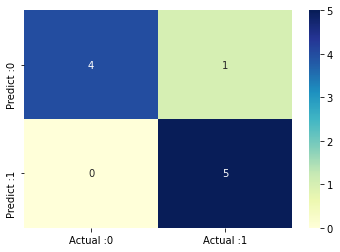

In [46]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual :0', 'Actual :1'], 
                                 index=['Predict :0', 'Predict :1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

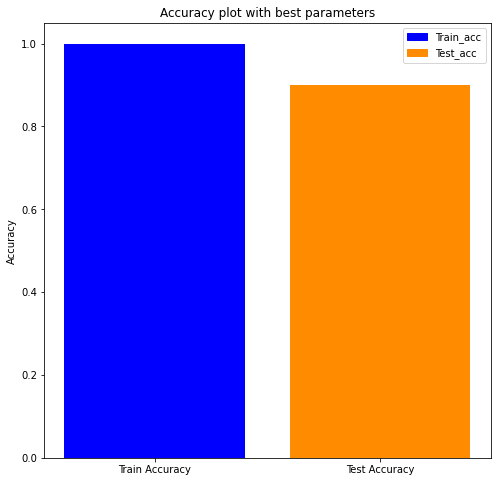

In [47]:
#plotting the best parameters
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
data_cnb = [train_acc_cnb,test_acc_cnb]
labels = ['Train Accuracy','Test Accuracy']
plt.xticks(range(len(data_cnb)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot with best parameters')
plt.bar(range(len(data_cnb)), data_cnb,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(8, 8)
plt.show()